In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib
matplotlib.style.use('ggplot')

In [2]:

IMAGE_SHAPE = (222244, 224)
TRAINING_DATA_DIR = 'train/'
VALID_DATA_DIR = 'test/'

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    shuffle=True,
    target_size=IMAGE_SHAPE,
)
valid_generator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    shuffle=False,
    target_size=IMAGE_SHAPE,
)

Found 2561 images belonging to 3 classes.
Found 589 images belonging to 3 classes.


In [14]:
def build_model(num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu',
                               input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Conv2D(
            filters=16, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Conv2D(
            filters=32, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [15]:
model = build_model(num_classes=3)

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [17]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 32)      

In [19]:
EPOCHS = 20
BATCH_SIZE = 32
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps=valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/20
80/80 [==============================] - 37s 459ms/step - loss: 0.9404 - accuracy: 0.5852 - val_loss: 0.6828 - val_accuracy: 0.8611
Epoch 2/20
80/80 [==============================] - 24s 302ms/step - loss: 0.4007 - accuracy: 0.9091 - val_loss: 0.2347 - val_accuracy: 0.9306
Epoch 3/20
80/80 [==============================] - 24s 295ms/step - loss: 0.1858 - accuracy: 0.9439 - val_loss: 0.1567 - val_accuracy: 0.9497
Epoch 4/20
80/80 [==============================] - 24s 301ms/step - loss: 0.1554 - accuracy: 0.9474 - val_loss: 0.1709 - val_accuracy: 0.9288
Epoch 5/20
80/80 [==============================] - 24s 303ms/step - loss: 0.1181 - accuracy: 0.9612 - val_loss: 0.1058 - val_accuracy: 0.9635
Epoch 6/20
80/80 [==============================] - 24s 302ms/step - loss: 0.0865 - accuracy: 0.9755 - val_loss: 0.0947 - val_accuracy: 0.9670
Epoch 7/20
80/80 [==============================] - 31s 392ms/step - loss: 0.1784 - accuracy: 0.9391 - val_loss: 0.0900 - val_accuracy: 0.9740

In [20]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

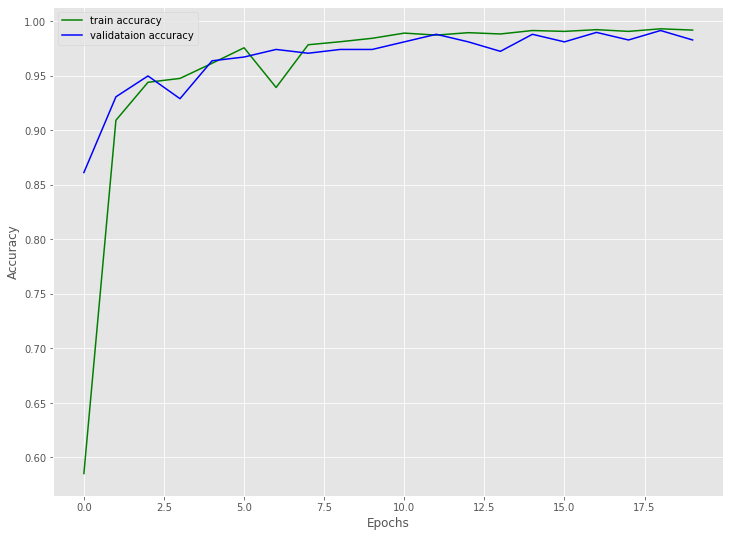

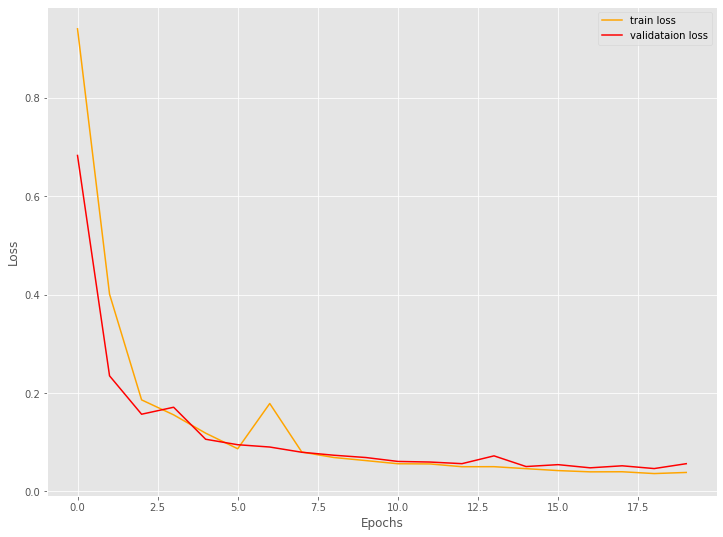

In [21]:
def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc, color='green', linestyle='-',
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-',
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss, color='orange', linestyle='-',
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-',
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()


save_plots(train_acc, valid_acc, train_loss, valid_loss)

In [22]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [23]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [25]:
new_model.save('my_model.h5')

In [24]:
print(new_model.predict(test_images).shape)

In [43]:
import cv2
import os
import numpy as np 
from keras.preprocessing import image


In [59]:
# # dsize
path = 'C:/Users/m.younis/Desktop/Dataset/test/doc/'

for i in os.listdir(path):
    if i.endswith('png'):
        img_path = path + i
        img = cv2.imread(img_path)
        img = cv2.resize(img,(224,224))  
        img = img.reshape(1,224,224,3)

        print(new_model.predict(img))


[[0.000000e+00 7.253501e-21 1.000000e+00]]
[[0. 0. 1.]]
[[0.0000000e+00 1.0000000e+00 1.1360861e-17]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0.0000000e+00 2.6164998e-23 1.0000000e+00]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0.0000000e+00 2.5128703e-21 1.0000000e+00]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0.0000000e+00 1.0000000e+00 2.0187383e-15]]
[[0. 1. 0.]]
[[1.0000000e+00 0.0